In [1]:
import os
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.geom
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.ticker as plticker
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)

In [2]:
connection = sqlite3.connect('/project/morriscb/src/ap_verify/test_new_cols/association.db')

In [3]:
tables = {'obj': 'DiaObject', 'src': 'DiaSource', 'ccd': 'CcdVisit'}

# only choose objects with validityEnd NULL because that means they are still valid
#objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, gPSFluxMean, validityEnd, flags from {0} where validityEnd is NULL;'.format(tables['obj']), connection)
objTable = pd.read_sql_query('select * from {0} where validityEnd is NULL;'.format(tables['obj']), connection)

stats_columns = [
 'gPSFluxMean',
 'gPSFluxMeanErr',
 'gPSFluxSigma',
 'gPSFluxChi2',
 'gPSFluxNdata',
    'gPSFluxMedian',
 'gPSFluxMAD',
 'gPSFluxSkew',
 'gPSFluxPercentile05',
 'gPSFluxPercentile25',
 'gPSFluxPercentile75',
 'gPSFluxPercentile95',
 'gPSFluxMin',
 'gPSFluxMax',
 'gPSFluxStetsonJ',
 'gPSFluxLinearSlope',
 'gPSFluxLinearIntercept',
 'gPSFluxMaxSlope',
 'gPSFluxErrMean']

obj = pd.read_sql_query(f'select {",".join(stats_columns)} from {tables["obj"]} where validityEnd is NULL and flags=0;', connection)


#srcTable = pd.read_sql_query('select diaSourceId, diaObjectId, ccdVisitId, flags from {0};'.format(tables['src']), connection)


In [4]:
objTable.columns.tolist()

['diaObjectId',
 'validityStart',
 'validityEnd',
 'ra',
 'raErr',
 'decl',
 'declErr',
 'ra_decl_Cov',
 'radecTai',
 'pmRa',
 'pmRaErr',
 'pmDecl',
 'pmDeclErr',
 'parallax',
 'parallaxErr',
 'pmRa_pmDecl_Cov',
 'pmRa_parallax_Cov',
 'pmDecl_parallax_Cov',
 'pmParallaxLnL',
 'pmParallaxChi2',
 'pmParallaxNdata',
 'uPSFluxMean',
 'uPSFluxMeanErr',
 'uPSFluxSigma',
 'uPSFluxChi2',
 'uPSFluxNdata',
 'uFPFluxMean',
 'uFPFluxMeanErr',
 'uFPFluxSigma',
 'gPSFluxMean',
 'gPSFluxMeanErr',
 'gPSFluxSigma',
 'gPSFluxChi2',
 'gPSFluxNdata',
 'gFPFluxMean',
 'gFPFluxMeanErr',
 'gFPFluxSigma',
 'rPSFluxMean',
 'rPSFluxMeanErr',
 'rPSFluxSigma',
 'rPSFluxChi2',
 'rPSFluxNdata',
 'rFPFluxMean',
 'rFPFluxMeanErr',
 'rFPFluxSigma',
 'iPSFluxMean',
 'iPSFluxMeanErr',
 'iPSFluxSigma',
 'iPSFluxChi2',
 'iPSFluxNdata',
 'iFPFluxMean',
 'iFPFluxMeanErr',
 'iFPFluxSigma',
 'zPSFluxMean',
 'zPSFluxMeanErr',
 'zPSFluxSigma',
 'zPSFluxChi2',
 'zPSFluxNdata',
 'zFPFluxMean',
 'zFPFluxMeanErr',
 'zFPFluxSigma',


In [5]:
obj.columns.tolist()

['gPSFluxMean',
 'gPSFluxMeanErr',
 'gPSFluxSigma',
 'gPSFluxChi2',
 'gPSFluxNdata',
 'gPSFluxMedian',
 'gPSFluxMAD',
 'gPSFluxSkew',
 'gPSFluxPercentile05',
 'gPSFluxPercentile25',
 'gPSFluxPercentile75',
 'gPSFluxPercentile95',
 'gPSFluxMin',
 'gPSFluxMax',
 'gPSFluxStetsonJ',
 'gPSFluxLinearSlope',
 'gPSFluxLinearIntercept',
 'gPSFluxMaxSlope',
 'gPSFluxErrMean']

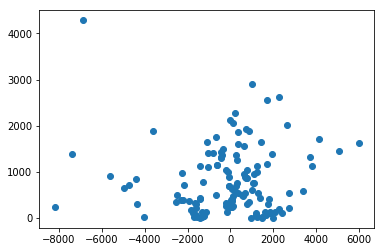

In [6]:
plt.scatter(obj['gPSFluxMedian'],obj['gPSFluxMAD'])

(array([41., 56., 24.,  4.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([-0.99993426,  0.81758942,  2.6351131 ,  4.45263677,  6.27016045,
         8.08768412,  9.9052078 , 11.72273148, 13.54025515, 15.35777883,
        17.17530251]),
 <a list of 10 Patch objects>)

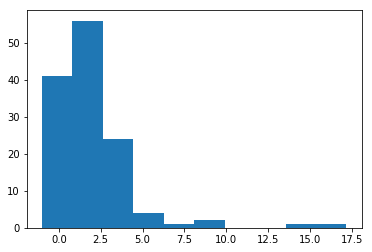

In [7]:
plt.hist(obj.loc[obj['gPSFluxStetsonJ'].notnull(),'gPSFluxStetsonJ'])

(array([79., 30., 10.,  3.,  3.,  2.,  1.,  0.,  0.,  2.]),
 array([ -3766.68237305,  18801.14680176,  41368.97597656,  63936.80515137,
         86504.63432617, 109072.46350098, 131640.29267578, 154208.12185059,
        176775.95102539, 199343.7802002 , 221911.609375  ]),
 <a list of 10 Patch objects>)

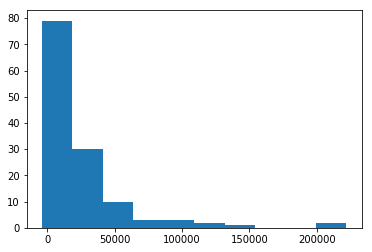

In [8]:
plt.hist(obj.loc[obj['gPSFluxMaxSlope'].notnull(),'gPSFluxMaxSlope'])

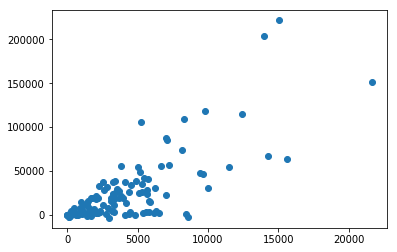

In [9]:
plt.scatter(obj['gPSFluxMax'] - obj['gPSFluxMin'],obj['gPSFluxMaxSlope'])

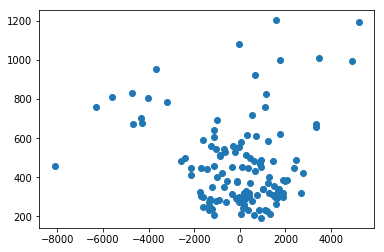

In [10]:
plt.scatter(obj['gPSFluxMean'],obj['gPSFluxErrMean'])